In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [3]:
# Importando a base de dados de salarios dos EUA.
Salario = pd.read_csv("Salary_dataset.csv")

In [4]:
Salario.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [5]:
# Excluindo coluna desnecessaria para a análise.
Salario = Salario.drop(columns = {"Unnamed: 0"})

In [6]:
Salario.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [7]:
Salario.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [8]:
Salario.shape

(30, 2)

In [9]:
Amostra_Salario = Salario.sample(n = 30, random_state = 100)

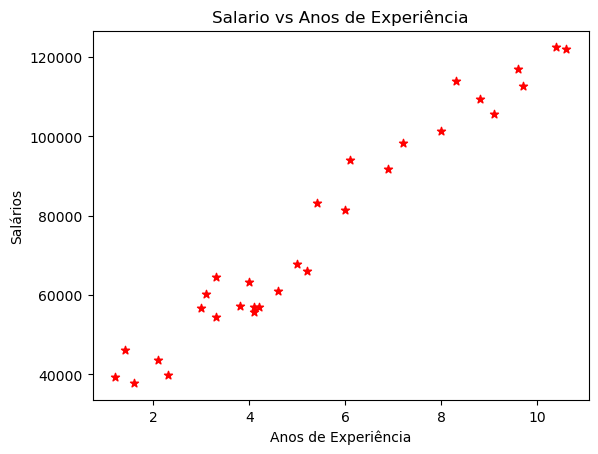

In [10]:
plt.scatter(Amostra_Salario["YearsExperience"], Amostra_Salario["Salary"], color="red", marker = "*")
plt.xlabel("Anos de Experiência")
plt.ylabel("Salários")
plt.title("Salario vs Anos de Experiência")
plt.show()


In [11]:
Valor_Salario = Salario["Salary"]

In [12]:
stats.shapiro(Valor_Salario)

ShapiroResult(statistic=0.9103154593927696, pvalue=0.015155591078390984)

In [13]:
T_Critico = stats.t.ppf(0.975, df = len(Valor_Salario) -1)
Erro_Amostral = T_Critico * np.std(Valor_Salario, ddof= 1) / np.sqrt(len(Valor_Salario))
Erro_Amostral

10236.716317287064

In [14]:
Intervalo_Confiança_Superior = np.mean(Valor_Salario) + Erro_Amostral 
Intervalo_Confiança_Inferior = np.mean(Valor_Salario) - Erro_Amostral 

In [15]:
print(f"A média amostral dos salarios nos EUA é de U${np.mean(Valor_Salario):.2f}\nO erro amostral é de U${Erro_Amostral:.2f}\nEntão o intervalo de confiança superiror é de U${Intervalo_Confiança_Superior:.2f} e o intervalo de confiança inferior é de U${Intervalo_Confiança_Inferior:.2f}")

A média amostral dos salarios nos EUA é de U$76004.00
O erro amostral é de U$10236.72
Então o intervalo de confiança superiror é de U$86240.72 e o intervalo de confiança inferior é de U$65767.28


In [16]:
#Verificando a correlação entre salario e anos de experiência.
stats.pearsonr(Salario["Salary"], Salario["YearsExperience"])

PearsonRResult(statistic=0.9782416184887597, pvalue=1.1430681092273186e-20)

In [17]:
# Dividindo a base de dados em treino e teste.
X_train, X_Test, Y_train, Y_test = train_test_split(Salario["YearsExperience"],Salario["Salary"], test_size = 0.2, random_state = 100)

In [18]:
if isinstance(X_Test, pd.Series):
    X_Test = X_Test.to_frame()


X_Test = np.array(X_Test).reshape(-1, 1) 
Y_test = np.array(Y_test).reshape(-1, 1)  

In [19]:
# Treinando o modelo de regressão linear.
Regressao = linear_model.LinearRegression()
Regressao.fit(X_train.values.reshape(-1,1), Y_train.values.reshape(-1,1))

LinearRegression()

In [20]:
X_Test = np.array(X_Test).reshape(-1,X_Test.shape[1])
Y_test = np.array(Y_test).reshape(-1,1)

In [21]:
#Avaliando o modelo.
R2 = Regressao.score(X_Test, Y_test)
print(f'{R2:.2f}')

0.97
